In [1]:
data<- read.csv("pva97nk.csv")
str(data)

'data.frame':	9686 obs. of  28 variables:
 $ TargetB         : int  0 0 1 1 0 1 0 0 1 0 ...
 $ ID              : int  14974 6294 46110 185937 29637 112632 123712 45409 19094 178271 ...
 $ TargetD         : num  NA NA 4 10 NA 11 NA NA 40 NA ...
 $ GiftCnt36       : int  2 1 6 3 1 3 2 1 1 1 ...
 $ GiftCntAll      : int  4 8 41 12 1 11 4 4 3 5 ...
 $ GiftCntCard36   : int  1 0 3 3 1 2 2 0 0 1 ...
 $ GiftCntCardAll  : int  3 3 20 8 1 9 3 3 1 2 ...
 $ GiftAvgLast     : num  17 20 6 10 20 11 15 15 35 6 ...
 $ GiftAvg36       : num  13.5 20 5.17 8.67 20 ...
 $ GiftAvgAll      : num  9.25 15.88 3.73 8.5 20 ...
 $ GiftAvgCard36   : num  17 NA 5 8.67 20 8 20 NA NA 20 ...
 $ GiftTimeLast    : int  21 26 18 9 21 22 17 18 17 18 ...
 $ GiftTimeFirst   : int  66 92 111 93 21 102 57 90 44 78 ...
 $ PromCnt12       : int  8 14 12 14 10 11 13 10 15 14 ...
 $ PromCnt36       : int  17 35 23 22 15 21 34 19 32 28 ...
 $ PromCntAll      : int  26 79 51 44 13 45 44 40 56 50 ...
 $ PromCntCard12   : int  3 5 

In [2]:
sapply(data, function(x) {sum(is.na(x))})


TargetB               ID          TargetD        GiftCnt36 
               0                0             4843                0 
      GiftCntAll    GiftCntCard36   GiftCntCardAll      GiftAvgLast 
               0                0                0                0 
       GiftAvg36       GiftAvgAll    GiftAvgCard36     GiftTimeLast 
               0                0             1780                0 
   GiftTimeFirst        PromCnt12        PromCnt36       PromCntAll 
               0                0                0                0 
   PromCntCard12    PromCntCard36   PromCntCardAll    StatusCat96NK 
               0                0                0                0 
StatusCatStarAll       DemCluster           DemAge        DemGender 
               0                0             2407                0 
    DemHomeOwner  DemMedHomeValue   DemPctVeterans     DemMedIncome 
               0                0                0                0

In [3]:
data$TargetD[is.na(data$TargetD)] <- 0 

In [4]:
data$GiftAvgCard36[is.na(data$GiftAvgCard36)] <- mean(data$GiftAvgCard36, na.rm=TRUE)


In [5]:
data$DemAge[is.na(data$DemAge)] <- mean(data$DemAge, na.rm=TRUE)

In [6]:
library(moments)

In [7]:
skewness(data$TargetD)


[1] 4.170038

In [8]:
kurtosis(data$TargetD)

[1] 44.6852

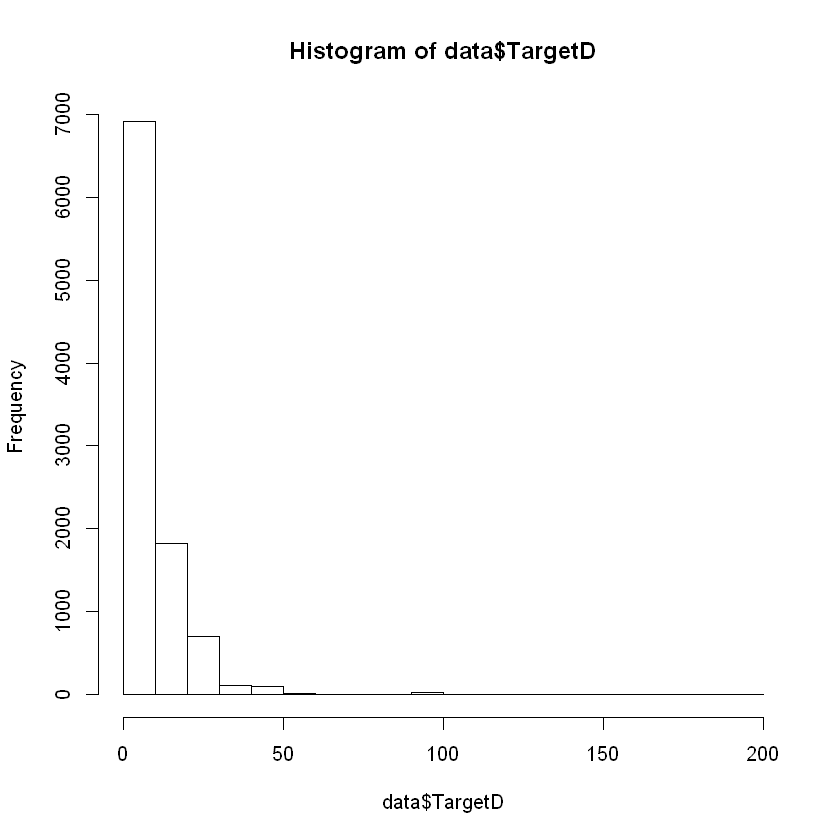

In [9]:
hist(data$TargetD)

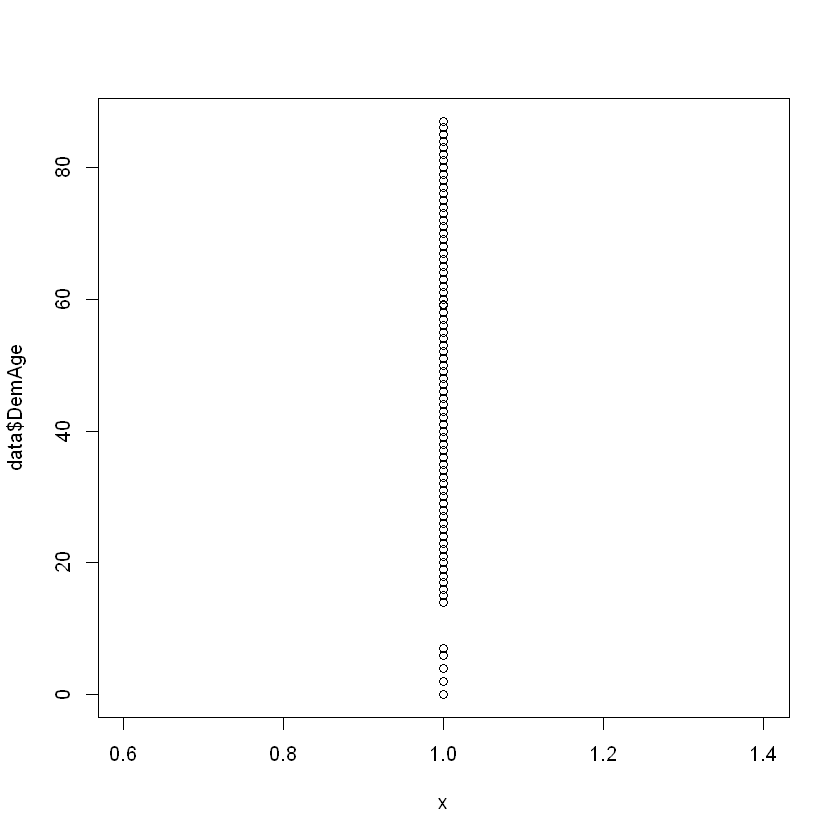

In [11]:
x = rep(1,nrow(data))
plot(x,data$DemAge)

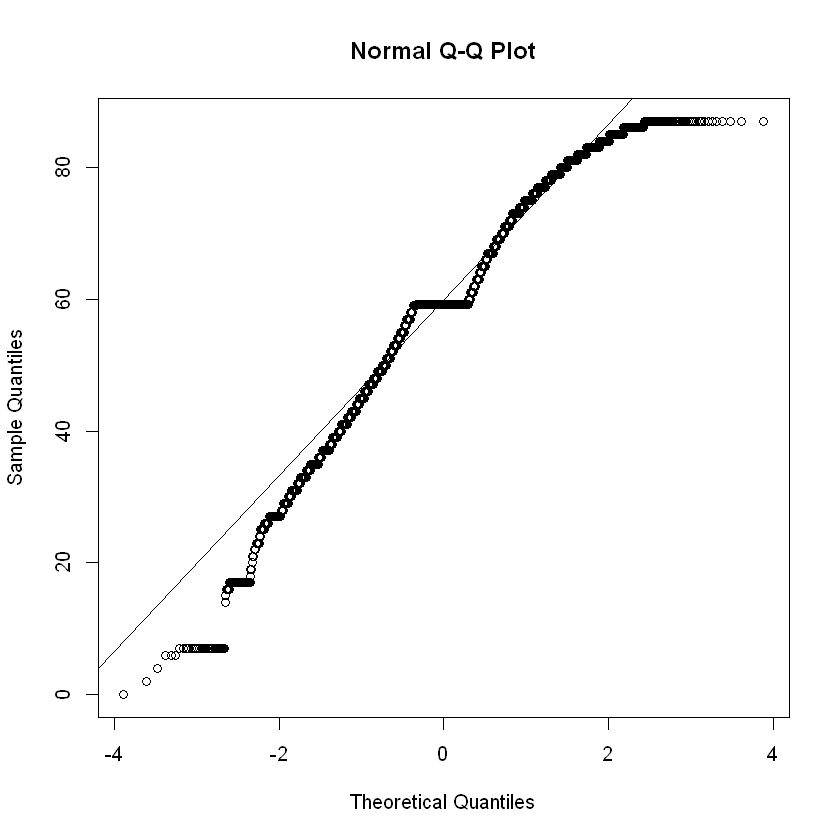

In [12]:
qqnorm(data$DemAge)
qqline(data$DemAge)

In [14]:
str(data)

'data.frame':	9686 obs. of  28 variables:
 $ TargetB         : int  0 0 1 1 0 1 0 0 1 0 ...
 $ ID              : int  14974 6294 46110 185937 29637 112632 123712 45409 19094 178271 ...
 $ TargetD         : num  0 0 4 10 0 11 0 0 40 0 ...
 $ GiftCnt36       : int  2 1 6 3 1 3 2 1 1 1 ...
 $ GiftCntAll      : int  4 8 41 12 1 11 4 4 3 5 ...
 $ GiftCntCard36   : int  1 0 3 3 1 2 2 0 0 1 ...
 $ GiftCntCardAll  : int  3 3 20 8 1 9 3 3 1 2 ...
 $ GiftAvgLast     : num  17 20 6 10 20 11 15 15 35 6 ...
 $ GiftAvg36       : num  13.5 20 5.17 8.67 20 ...
 $ GiftAvgAll      : num  9.25 15.88 3.73 8.5 20 ...
 $ GiftAvgCard36   : num  17 14.22 5 8.67 20 ...
 $ GiftTimeLast    : int  21 26 18 9 21 22 17 18 17 18 ...
 $ GiftTimeFirst   : int  66 92 111 93 21 102 57 90 44 78 ...
 $ PromCnt12       : int  8 14 12 14 10 11 13 10 15 14 ...
 $ PromCnt36       : int  17 35 23 22 15 21 34 19 32 28 ...
 $ PromCntAll      : int  26 79 51 44 13 45 44 40 56 50 ...
 $ PromCntCard12   : int  3 5 5 2 4 5 6 4 6 5 .

In [17]:
datanum <- data[c(1,2,3,4,5)]
cor(datanum)

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll
TargetB,1.00000000,0.01680356,0.66392322,0.13782922,0.10866124
ID,0.01680356,1.00000000,0.02266167,-0.05248120,-0.13354287
TargetD,0.66392322,0.02266167,1.00000000,-0.07901731,-0.04957748
GiftCnt36,0.13782922,-0.05248120,-0.07901731,1.00000000,0.55024201
GiftCntAll,0.10866124,-0.13354287,-0.04957748,0.55024201,1.00000000


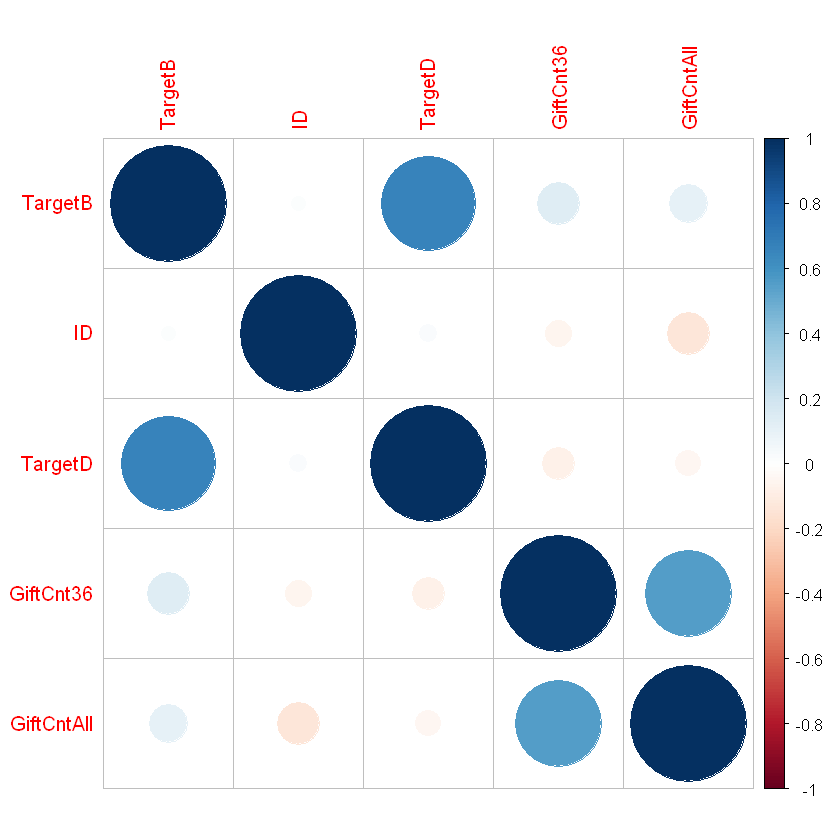

In [19]:
library(corrplot)
corrplot(cor(datanum))

In [24]:
dt = (sample(nrow(data),nrow(data)*.7))
train<-data[dt,]
testdiv<-data[-dt,]

In [25]:
dtest = (sample(nrow(testdiv),nrow(testdiv)*.5))
val<-testdiv[dtest,]
test<-testdiv[-dtest,]

In [26]:
nrow(train)
nrow(test)
nrow(val)

[1] 6780

[1] 1453

[1] 1453